In [1]:
import pandas as pd
import numpy
import matplotlib as plt
import pickle as pkl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

nedenunder indsætter vi vores datasæt med pandas og tjekker om den kan læse det korrekt

In [2]:
df = pd.read_csv("data/stackoverflow_full.csv")
pd.DataFrame(df)

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Her har jeg fundet hver del af datasættet og ændret dem som ikke er med tal om til tal.

Derefter har jeg plottet mine features og om det blev employed.

Samtidig gar jeg lavet et test sæt til at finde ud af hvor akkurat vores ML er.

In [3]:
age = {"<35": 0, ">35": 1}
df["Age"] = df["Age"].map(age)

edlevel = {"Maser": 0, "PhD": 1, "Undergraduate": 2}
df["EdLevel"] = df["EdLevel"].map(edlevel)

gender = {"Man": 0, "Female": 1, "NonBinary": 2}
df["Gender"] = df["Gender"].map(gender)

train, test = train_test_split(df, test_size=0.2, shuffle=True)

features = ["Age", "EdLevel", "Gender", "YearsCode", "YearsCodePro", "ComputerSkills"]

train_X = train[features]
train_y = train["Employed"]

test_X = test[features]
test_y = test["Employed"]

Nu har jeg så lavet en decision tree som jeg har kalft for "dtree" og fit den med vores train_x og train_y som ikke er vores træningsæt som vi bruger til at finde ud af hvor akkurat den er. Træningsættet har vi sat ind i nedenunder

Dermed har vi lavet en pickel fil ud af vores model kaldet "Job.pkl"

Her kan man se at den er 77.5% akkurat

0.7790104131218948


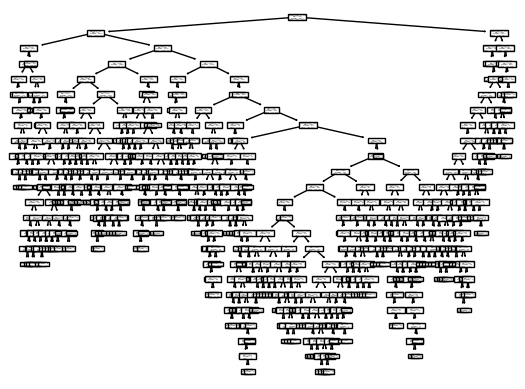

In [4]:
dtree = DecisionTreeClassifier()
dtree.fit(train_X, train_y)
tree.plot_tree(dtree, feature_names=features) 

print(dtree.score(test_X, test_y))

model_filename = 'Job.pkl'
pkl.dump(dtree, open(model_filename,'wb'))

Her tester vi så pikkelfilen og ser om den kan give et output. Og den giver os 0 som betyder man ikke blev employed

In [5]:
model = pkl.load(open('Job.pkl','rb'))
print(model.predict([[0, 0, 0, 0, 1, 5]]))



[0]


/home/victorgd/Documents/MLKaggle/venv/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
